In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# %matplotlib nbagg 
%matplotlib notebook
# %matplotlib inline



## Third party 
import numpy as np
import os, time, zarr, sys
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

import unslice.IO as io
from unslice.utils import *
from unslice.registration.featmatch import *
from unslice.registration.transform import *
from unslice.registration.rigid import *
from unslice.registration.gpu_transform import *
from unslice.registration.utils import *
from unslice.segmentation import *
from unslice.tracing.pyoof import OOF, apply_oof_v2
from unslice.tracing.skel import *
from unslice.flatten import *
from unslice.lightsheetcorrect import *




In [3]:
# Parameters that are constant throughout notebook
working_dir = '/mnt/share3/webster/mEhmAD_1-2-3_ptau'

def bdir(fname):
    return os.path.join(working_dir, fname)

# prefix to add to the beginning of each filename 
name_prefix = '1-ptau' 
name_prefix2 = '3-ptau' 
name_prefix3 = '2-ptau'

### Pre-processing
[1. Convert to zarr](#convert)<br>
[2. Flatten warp](#flattenwarp)<br>
[3. Lectin warp](#anchorwarp)<br>

### Endpoint detection
[5. Vessel filter](#oof)<br>
[6. Vessel segment](#vessel_segment)<br>
[7. Vessel skeletonization](#skel)<br>
[8. Vessel endpoint detection](#epdetect)<br>

In [3]:
# 3

slab_path = bdir('3-ptau_flattened_anchorwarp_r1_4xdownsampled_tiffs')
slab_zarr_path = bdir(name_prefix2+'.zarr')
pc2_img_size = (4525,2025,2183) 


## Optional parameters 
load_num_slices = 40 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (1,1) # original is (0.306,0.433,0.306)
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
xrange = None
yrange = None
zrange = [1000,2183]

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:0-4525, y:0-2025, z:1000-1040


100%|██████████| 40/40 [00:05<00:00,  6.94it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:03<00:00, 77.67it/s] 


Processing chunk x:0-4525, y:0-2025, z:1040-1080


100%|██████████| 40/40 [00:05<00:00,  6.98it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:17<00:00, 14.27it/s]

Processing chunk x:0-4525, y:0-2025, z:1080-1120



100%|██████████| 40/40 [00:06<00:00,  5.90it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:17<00:00, 14.18it/s]

Processing chunk x:0-4525, y:0-2025, z:1120-1160



100%|██████████| 40/40 [00:06<00:00,  5.89it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:22<00:00, 11.32it/s]


Processing chunk x:0-4525, y:0-2025, z:1160-1200


100%|██████████| 40/40 [00:06<00:00,  6.29it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.30it/s]

Processing chunk x:0-4525, y:0-2025, z:1200-1240



100%|██████████| 40/40 [00:07<00:00,  5.57it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 59.49it/s]


Processing chunk x:0-4525, y:0-2025, z:1240-1280


100%|██████████| 40/40 [00:06<00:00,  5.95it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:12<00:00, 21.07it/s]

Processing chunk x:0-4525, y:0-2025, z:1280-1320



100%|██████████| 40/40 [00:06<00:00,  5.94it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:19<00:00, 13.28it/s]


Processing chunk x:0-4525, y:0-2025, z:1320-1360


100%|██████████| 40/40 [00:06<00:00,  5.95it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:22<00:00, 11.27it/s]

Processing chunk x:0-4525, y:0-2025, z:1360-1400



100%|██████████| 40/40 [00:06<00:00,  5.89it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:28<00:00,  9.00it/s]


Processing chunk x:0-4525, y:0-2025, z:1400-1440


100%|██████████| 40/40 [00:06<00:00,  6.05it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 54.46it/s]


Processing chunk x:0-4525, y:0-2025, z:1440-1480


100%|██████████| 40/40 [00:06<00:00,  6.09it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.57it/s]

Processing chunk x:0-4525, y:0-2025, z:1480-1520



100%|██████████| 40/40 [00:06<00:00,  5.82it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:18<00:00, 13.53it/s]

Processing chunk x:0-4525, y:0-2025, z:1520-1560



100%|██████████| 40/40 [00:07<00:00,  5.59it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:22<00:00, 11.49it/s]


Processing chunk x:0-4525, y:0-2025, z:1560-1600


100%|██████████| 40/40 [00:06<00:00,  6.56it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:26<00:00,  9.60it/s]

Processing chunk x:0-4525, y:0-2025, z:1600-1640



100%|██████████| 40/40 [00:06<00:00,  6.10it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:04<00:00, 60.54it/s]


Processing chunk x:0-4525, y:0-2025, z:1640-1680


100%|██████████| 40/40 [00:07<00:00,  5.45it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.81it/s]


Processing chunk x:0-4525, y:0-2025, z:1680-1720


100%|██████████| 40/40 [00:06<00:00,  5.91it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:16<00:00, 15.56it/s]


Processing chunk x:0-4525, y:0-2025, z:1720-1760


100%|██████████| 40/40 [00:06<00:00,  6.24it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:22<00:00, 11.24it/s]


Processing chunk x:0-4525, y:0-2025, z:1760-1800


100%|██████████| 40/40 [00:07<00:00,  5.55it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:25<00:00,  9.79it/s]

Processing chunk x:0-4525, y:0-2025, z:1800-1840



100%|██████████| 40/40 [00:06<00:00,  6.07it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:04<00:00, 58.84it/s]

Processing chunk x:0-4525, y:0-2025, z:1840-1880



100%|██████████| 40/40 [00:06<00:00,  6.02it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:12<00:00, 20.43it/s]


Processing chunk x:0-4525, y:0-2025, z:1880-1920


100%|██████████| 40/40 [00:06<00:00,  5.85it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:17<00:00, 14.71it/s]


Processing chunk x:0-4525, y:0-2025, z:1920-1960


100%|██████████| 40/40 [00:06<00:00,  5.90it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:21<00:00, 11.95it/s]

Processing chunk x:0-4525, y:0-2025, z:1960-2000



100%|██████████| 40/40 [00:05<00:00,  7.94it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.16it/s]

Processing chunk x:0-4525, y:0-2025, z:2000-2040



100%|██████████| 40/40 [00:05<00:00,  7.41it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:02<00:00, 84.55it/s]

Processing chunk x:0-4525, y:0-2025, z:2040-2080



100%|██████████| 40/40 [00:04<00:00,  8.00it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:09<00:00, 25.90it/s]

Processing chunk x:0-4525, y:0-2025, z:2080-2120



100%|██████████| 40/40 [00:05<00:00,  7.61it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.70it/s]


Processing chunk x:0-4525, y:0-2025, z:2120-2160


100%|██████████| 40/40 [00:05<00:00,  7.86it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:14<00:00, 17.31it/s]


Processing chunk x:0-4525, y:0-2025, z:2160-2183


100%|██████████| 23/23 [00:02<00:00,  9.54it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:16<00:00, 15.23it/s]


675.1164605617523 seconds elapsed


In [4]:
# 1

slab_path = bdir('1-ptau_flattened_4xdownsampled_tiffs')
slab_zarr_path = bdir(name_prefix+'.zarr')
pc2_img_size = (4525,2025,1334) 


## Optional parameters 
load_num_slices = 40 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (1,1) # original is (0.306,0.433,0.306)
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
xrange = None
yrange = None
zrange = None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:0-4525, y:0-2025, z:0-40


100%|██████████| 40/40 [00:05<00:00,  7.54it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:03<00:00, 78.49it/s]


Processing chunk x:0-4525, y:0-2025, z:40-80


100%|██████████| 40/40 [00:04<00:00,  8.53it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:08<00:00, 29.36it/s]

Processing chunk x:0-4525, y:0-2025, z:80-120



100%|██████████| 40/40 [00:04<00:00,  8.64it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:12<00:00, 20.98it/s]

Processing chunk x:0-4525, y:0-2025, z:120-160



100%|██████████| 40/40 [00:05<00:00,  7.51it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:17<00:00, 14.73it/s]


Processing chunk x:0-4525, y:0-2025, z:160-200


100%|██████████| 40/40 [00:05<00:00,  6.70it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:21<00:00, 11.79it/s]

Processing chunk x:0-4525, y:0-2025, z:200-240



100%|██████████| 40/40 [00:06<00:00,  5.90it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 53.13it/s]


Processing chunk x:0-4525, y:0-2025, z:240-280


100%|██████████| 40/40 [00:07<00:00,  5.39it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:12<00:00, 19.47it/s]

Processing chunk x:0-4525, y:0-2025, z:280-320



100%|██████████| 40/40 [00:06<00:00,  6.25it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:19<00:00, 13.14it/s]


Processing chunk x:0-4525, y:0-2025, z:320-360


100%|██████████| 40/40 [00:06<00:00,  5.77it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.48it/s]

Processing chunk x:0-4525, y:0-2025, z:360-400



100%|██████████| 40/40 [00:06<00:00,  6.15it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:30<00:00,  8.41it/s]


Processing chunk x:0-4525, y:0-2025, z:400-440


100%|██████████| 40/40 [00:06<00:00,  5.94it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 53.77it/s]


Processing chunk x:0-4525, y:0-2025, z:440-480


100%|██████████| 40/40 [00:06<00:00,  6.38it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:12<00:00, 20.38it/s]

Processing chunk x:0-4525, y:0-2025, z:480-520



100%|██████████| 40/40 [00:06<00:00,  5.96it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:19<00:00, 13.08it/s]

Processing chunk x:0-4525, y:0-2025, z:520-560



100%|██████████| 40/40 [00:06<00:00,  6.32it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.34it/s]

Processing chunk x:0-4525, y:0-2025, z:560-600



100%|██████████| 40/40 [00:06<00:00,  6.06it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:29<00:00,  8.57it/s]

Processing chunk x:0-4525, y:0-2025, z:600-640



100%|██████████| 40/40 [00:06<00:00,  5.97it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:05<00:00, 50.31it/s]


Processing chunk x:0-4525, y:0-2025, z:640-680


100%|██████████| 40/40 [00:06<00:00,  5.99it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:12<00:00, 19.80it/s]


Processing chunk x:0-4525, y:0-2025, z:680-720


100%|██████████| 40/40 [00:06<00:00,  5.86it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:19<00:00, 13.05it/s]


Processing chunk x:0-4525, y:0-2025, z:720-760


100%|██████████| 40/40 [00:06<00:00,  6.10it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.21it/s]

Processing chunk x:0-4525, y:0-2025, z:760-800



100%|██████████| 40/40 [00:07<00:00,  5.71it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:29<00:00,  8.60it/s]

Processing chunk x:0-4525, y:0-2025, z:800-840



100%|██████████| 40/40 [00:06<00:00,  6.01it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:04<00:00, 51.92it/s]

Processing chunk x:0-4525, y:0-2025, z:840-880



100%|██████████| 40/40 [00:06<00:00,  5.98it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:12<00:00, 20.64it/s]


Processing chunk x:0-4525, y:0-2025, z:880-920


100%|██████████| 40/40 [00:06<00:00,  5.83it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:18<00:00, 13.62it/s]


Processing chunk x:0-4525, y:0-2025, z:920-960


100%|██████████| 40/40 [00:06<00:00,  6.30it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:25<00:00,  9.91it/s]


Processing chunk x:0-4525, y:0-2025, z:960-1000


100%|██████████| 40/40 [00:06<00:00,  5.93it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:29<00:00,  8.47it/s]


Processing chunk x:0-4525, y:0-2025, z:1000-1040


100%|██████████| 40/40 [00:06<00:00,  6.05it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 52.09it/s]


Processing chunk x:0-4525, y:0-2025, z:1040-1080


100%|██████████| 40/40 [00:06<00:00,  5.92it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:12<00:00, 20.45it/s]

Processing chunk x:0-4525, y:0-2025, z:1080-1120



100%|██████████| 40/40 [00:04<00:00,  8.50it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:19<00:00, 13.28it/s]


Processing chunk x:0-4525, y:0-2025, z:1120-1160


100%|██████████| 40/40 [00:05<00:00,  7.93it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:23<00:00, 10.95it/s]


Processing chunk x:0-4525, y:0-2025, z:1160-1200


100%|██████████| 40/40 [00:05<00:00,  7.57it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:25<00:00,  9.90it/s]


Processing chunk x:0-4525, y:0-2025, z:1200-1240


100%|██████████| 40/40 [00:04<00:00,  8.14it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:03<00:00, 64.71it/s]


Processing chunk x:0-4525, y:0-2025, z:1240-1280


100%|██████████| 40/40 [00:04<00:00,  8.48it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:08<00:00, 29.30it/s]


Processing chunk x:0-4525, y:0-2025, z:1280-1320


100%|██████████| 40/40 [00:04<00:00,  8.91it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:11<00:00, 22.17it/s]


Processing chunk x:0-4525, y:0-2025, z:1320-1334


100%|██████████| 14/14 [00:01<00:00,  8.66it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:13<00:00, 19.13it/s]


772.4213163852692 seconds elapsed


In [5]:
# 2

slab_path = bdir('2-ptau_flattened_lectinwarp_4xdownsampled_tiffs')
slab_zarr_path = bdir(name_prefix3+'.zarr')
pc2_img_size = (4525,2025,1344) 


## Optional parameters 
load_num_slices = 40 # should be smaller than z chunk size, default None 
resample_num_slices = 1 # number of slices to be processed in one go for resampling, default 1
resample_factor = (1,1) # original is (0.306,0.433,0.306)
chunks = (200,200,200) 
num_workers = 20 
file_names = 'img_[0-9]{4}.tiff' # default 'img_[0-9]{4}.tiff'

## crop
xrange = None
yrange = None
zrange = None

## rotate
lateral_rotate_angle = None # default None

## flip
flip = (0,0,0) # default (0,0,0)


#############
start = time.time()
utils.convert_to_zarr_v2(slab_path, slab_zarr_path, pc2_img_size, load_num_slices=load_num_slices,
                        resample_num_slices=resample_num_slices, file_names=file_names, 
                        chunks=chunks, num_workers=num_workers, lateral_rotate_angle=lateral_rotate_angle,
                        flip=flip, crop_xcoords=xrange, crop_ycoords=yrange, crop_zcoords=zrange,
                        resample_factor=resample_factor)
print(time.time()-start, 'seconds elapsed')

Processing chunk x:0-4525, y:0-2025, z:0-40


100%|██████████| 40/40 [00:06<00:00,  6.57it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:03<00:00, 72.50it/s]

Processing chunk x:0-4525, y:0-2025, z:40-80



100%|██████████| 40/40 [00:05<00:00,  7.84it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:09<00:00, 27.84it/s]


Processing chunk x:0-4525, y:0-2025, z:80-120


100%|██████████| 40/40 [00:05<00:00,  7.24it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:14<00:00, 17.92it/s]

Processing chunk x:0-4525, y:0-2025, z:120-160



100%|██████████| 40/40 [00:06<00:00,  6.01it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:20<00:00, 12.55it/s]

Processing chunk x:0-4525, y:0-2025, z:160-200



100%|██████████| 40/40 [00:06<00:00,  6.28it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:23<00:00, 10.89it/s]


Processing chunk x:0-4525, y:0-2025, z:200-240


100%|██████████| 40/40 [00:06<00:00,  6.29it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 61.77it/s]


Processing chunk x:0-4525, y:0-2025, z:240-280


100%|██████████| 40/40 [00:06<00:00,  6.29it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:10<00:00, 23.56it/s]


Processing chunk x:0-4525, y:0-2025, z:280-320


100%|██████████| 40/40 [00:06<00:00,  6.36it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:16<00:00, 15.14it/s]


Processing chunk x:0-4525, y:0-2025, z:320-360


100%|██████████| 40/40 [00:06<00:00,  6.11it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:23<00:00, 10.71it/s]

Processing chunk x:0-4525, y:0-2025, z:360-400



100%|██████████| 40/40 [00:06<00:00,  6.49it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:25<00:00,  9.96it/s]

Processing chunk x:0-4525, y:0-2025, z:400-440



100%|██████████| 40/40 [00:06<00:00,  6.60it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:04<00:00, 59.66it/s]


Processing chunk x:0-4525, y:0-2025, z:440-480


100%|██████████| 40/40 [00:06<00:00,  6.42it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.83it/s]


Processing chunk x:0-4525, y:0-2025, z:480-520


100%|██████████| 40/40 [00:06<00:00,  6.26it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:16<00:00, 14.97it/s]


Processing chunk x:0-4525, y:0-2025, z:520-560


100%|██████████| 40/40 [00:06<00:00,  6.24it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:20<00:00, 12.37it/s]


Processing chunk x:0-4525, y:0-2025, z:560-600


100%|██████████| 40/40 [00:06<00:00,  6.23it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:26<00:00,  9.71it/s]

Processing chunk x:0-4525, y:0-2025, z:600-640



100%|██████████| 40/40 [00:06<00:00,  6.16it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 59.97it/s]


Processing chunk x:0-4525, y:0-2025, z:640-680


100%|██████████| 40/40 [00:05<00:00,  7.13it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:11<00:00, 22.13it/s]

Processing chunk x:0-4525, y:0-2025, z:680-720



100%|██████████| 40/40 [00:06<00:00,  6.18it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:16<00:00, 15.21it/s]

Processing chunk x:0-4525, y:0-2025, z:720-760



100%|██████████| 40/40 [00:06<00:00,  6.11it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:21<00:00, 11.79it/s]


Processing chunk x:0-4525, y:0-2025, z:760-800


100%|██████████| 40/40 [00:06<00:00,  5.80it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:25<00:00,  9.93it/s]


Processing chunk x:0-4525, y:0-2025, z:800-840


100%|██████████| 40/40 [00:06<00:00,  6.33it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:04<00:00, 61.25it/s]


Processing chunk x:0-4525, y:0-2025, z:840-880


100%|██████████| 40/40 [00:06<00:00,  6.65it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:10<00:00, 23.76it/s]


Processing chunk x:0-4525, y:0-2025, z:880-920


100%|██████████| 40/40 [00:06<00:00,  6.33it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:15<00:00, 16.61it/s]

Processing chunk x:0-4525, y:0-2025, z:920-960



100%|██████████| 40/40 [00:06<00:00,  6.54it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:22<00:00, 11.46it/s]


Processing chunk x:0-4525, y:0-2025, z:960-1000


100%|██████████| 40/40 [00:06<00:00,  6.36it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:24<00:00, 10.19it/s]

Processing chunk x:0-4525, y:0-2025, z:1000-1040



100%|██████████| 40/40 [00:06<00:00,  6.05it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:04<00:00, 61.94it/s]

Processing chunk x:0-4525, y:0-2025, z:1040-1080



100%|██████████| 40/40 [00:06<00:00,  6.45it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.32it/s]


Processing chunk x:0-4525, y:0-2025, z:1080-1120


100%|██████████| 40/40 [00:06<00:00,  6.39it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:17<00:00, 14.83it/s]


Processing chunk x:0-4525, y:0-2025, z:1120-1160


100%|██████████| 40/40 [00:06<00:00,  5.91it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:21<00:00, 11.63it/s]

Processing chunk x:0-4525, y:0-2025, z:1160-1200



100%|██████████| 40/40 [00:05<00:00,  7.43it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:24<00:00, 10.37it/s]


Processing chunk x:0-4525, y:0-2025, z:1200-1240


100%|██████████| 40/40 [00:05<00:00,  7.77it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:03<00:00, 83.47it/s]


Processing chunk x:0-4525, y:0-2025, z:1240-1280


100%|██████████| 40/40 [00:04<00:00,  8.05it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:09<00:00, 27.54it/s]


Processing chunk x:0-4525, y:0-2025, z:1280-1320


100%|██████████| 40/40 [00:03<00:00, 11.56it/s]


Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...


100%|██████████| 253/253 [00:11<00:00, 22.88it/s]


Processing chunk x:0-4525, y:0-2025, z:1320-1344


100%|██████████| 24/24 [00:02<00:00, 11.01it/s]

Data I/O, resampling, rotation complete. Commencing flip and zarr assignment...



100%|██████████| 253/253 [00:09<00:00, 26.78it/s]


719.2974994182587 seconds elapsed


# Endpoint detection

[Return to top](#top)

<a id='oof'></a>

## Object-oriented flux vesselness filter

In [7]:
## Parameters  
radii = np.arange(1,6,1)
options = {'response_type': 0,
          'use_absolute': True,
          'normalization_type': 1,
          'spacing': (1,1.414,1),
          'calc_eigenvectors': False,
           'do_oofofa': False
          }
# Inputs
slab_zarr_path = bdir(name_prefix+'.zarr')

# Restrict detection to mask areas
mask_zarr_path = None #bdir('1-lec_thinsurface_bottom_4xdownsampled_zadd.zarr') 
downsample_factor = (16,16,4) # 4x downsampled lectin + 4x downsampled surface 

# Outputs
slab_zarr_filtered_path = bdir(name_prefix+'_oof.zarr')

# Optional
top_slice_range = None 
use_cupy = True
num_workers = 6 # using more than 6 is too memory intensive and will throw an error 
overlap = (0,0,0)


###########################
start = time.time()
apply_oof_v2(slab_zarr_path, slab_zarr_filtered_path, 
         radii, slice_range=top_slice_range, use_cupy=use_cupy,overlap=overlap,
         num_workers=num_workers, mask_zarr_path=mask_zarr_path,downsample_factor=downsample_factor,
             **options)
print("Time elapsed for OOF filtering: %f hours"%((time.time()-start)/3600))

Starting vessel filter...



 12%|█▏        | 216/1771 [01:08<07:05,  3.65it/s]


 35%|███▍      | 618/1771 [06:05<22:38,  1.18s/it]


 56%|█████▌    | 988/1771 [13:00<16:03,  1.23s/it]


 80%|████████  | 1422/1771 [21:09<04:50,  1.20it/s]


100%|██████████| 1771/1771 [25:55<00:00,  1.14it/s]

Time elapsed for OOF filtering: 0.432125 hours


In [8]:
## Parameters  
radii = np.arange(1,6,1)
options = {'response_type': 0,
          'use_absolute': True,
          'normalization_type': 1,
          'spacing': (1,1.414,1),
          'calc_eigenvectors': False,
           'do_oofofa': False
          }
# Inputs
slab_zarr_path = bdir(name_prefix2+'.zarr')

# Restrict detection to mask areas
mask_zarr_path = None #bdir('1-lec_thinsurface_bottom_4xdownsampled_zadd.zarr') 
downsample_factor = (16,16,4) # 4x downsampled lectin + 4x downsampled surface 

# Outputs
slab_zarr_filtered_path = bdir(name_prefix2+'_oof.zarr')

# Optional
top_slice_range = None 
use_cupy = True
num_workers = 6 # using more than 6 is too memory intensive and will throw an error 
overlap = (0,0,0)


###########################
start = time.time()
apply_oof_v2(slab_zarr_path, slab_zarr_filtered_path, 
         radii, slice_range=top_slice_range, use_cupy=use_cupy,overlap=overlap,
         num_workers=num_workers, mask_zarr_path=mask_zarr_path,downsample_factor=downsample_factor,
             **options)
print("Time elapsed for OOF filtering: %f hours"%((time.time()-start)/3600))

Starting vessel filter...



 28%|██▊       | 421/1518 [08:20<17:30,  1.04it/s]


 55%|█████▌    | 839/1518 [16:06<15:03,  1.33s/it]


 80%|███████▉  | 1207/1518 [23:20<04:36,  1.12it/s]


100%|██████████| 1518/1518 [28:58<00:00,  1.15s/it]

Time elapsed for OOF filtering: 0.483059 hours


In [ ]:
## Parameters  
radii = np.arange(1,6,1)
options = {'response_type': 0,
          'use_absolute': True,
          'normalization_type': 1,
          'spacing': (1,1.414,1),
          'calc_eigenvectors': False,
           'do_oofofa': False
          }
# Inputs
slab_zarr_path = bdir(name_prefix3+'.zarr')

# Restrict detection to mask areas
mask_zarr_path = None #bdir('1-lec_thinsurface_bottom_4xdownsampled_zadd.zarr') 
downsample_factor = (16,16,4) # 4x downsampled lectin + 4x downsampled surface 

# Outputs
slab_zarr_filtered_path = bdir(name_prefix3+'_oof.zarr')

# Optional
top_slice_range = None 
use_cupy = True
num_workers = 6 # using more than 6 is too memory intensive and will throw an error 
overlap = (0,0,0)


###########################
start = time.time()
apply_oof_v2(slab_zarr_path, slab_zarr_filtered_path, 
         radii, slice_range=top_slice_range, use_cupy=use_cupy,overlap=overlap,
         num_workers=num_workers, mask_zarr_path=mask_zarr_path,downsample_factor=downsample_factor,
             **options)
print("Time elapsed for OOF filtering: %f hours"%((time.time()-start)/3600))

Starting vessel filter...



 21%|██        | 369/1771 [07:40<20:22,  1.15it/s]


 44%|████▍     | 781/1771 [15:48<24:38,  1.49s/it]


 52%|█████▏    | 926/1771 [18:58<16:19,  1.16s/it]

## Check vessel OOF

In [12]:
print(zarr.open(bdir(name_prefix+'.zarr')).shape)
print(zarr.open(bdir(name_prefix2+'.zarr')).shape)
print(zarr.open(bdir(name_prefix3+'.zarr')).shape)

(4525, 2025, 1334)
(4525, 2025, 1183)
(4525, 2025, 1344)


In [13]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix+'_oof.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_oof.tif'%(name_prefix,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
za = zarr.open(slab_zarr_path, mode='r')
imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/1-ptau_x2000-2800_y800-1200_z600-800.tif'

In [28]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix2+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix2+'_oof.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_oof.tif'%(name_prefix2,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix2,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
za = zarr.open(slab_zarr_path, mode='r')
imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/3-ptau_x2000-2800_y800-1200_z600-800.tif'

In [15]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix3+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix3+'_oof.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_oof.tif'%(name_prefix3,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix3,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
za = zarr.open(slab_zarr_path, mode='r')
imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/2-ptau_x2000-2800_y800-1200_z600-800.tif'

# Segmentation

## TODO

In [19]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = bdir(name_prefix+"_oof.zarr") #
zarr_segmented_path = bdir(name_prefix+"_segmented.zarr") #bdir('vessel_tests/'+name_prefix+'_segmented.zarr')

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "graphcut" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [25,50]
    morphopts = [None]*2 #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)

Starting image preprocessing..
Saturated image processed in 0.673403 minutes



100%|██████████| 1771/1771 [1:45:19<00:00,  3.57s/it]

In [20]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = bdir(name_prefix2+"_oof.zarr") #
zarr_segmented_path = bdir(name_prefix2+"_segmented.zarr") #bdir('vessel_tests/'+name_prefix+'_segmented.zarr')

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "graphcut" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [25,50]
    morphopts = [None]*2 #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)

Starting image preprocessing..
Saturated image processed in 0.844785 minutes



100%|██████████| 1518/1518 [1:26:12<00:00,  3.41s/it]

In [21]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = bdir(name_prefix3+"_oof.zarr") #
zarr_segmented_path = bdir(name_prefix3+"_segmented.zarr") #bdir('vessel_tests/'+name_prefix+'_segmented.zarr')

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "graphcut" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [25,50]
    morphopts = [None]*2 #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)

Starting image preprocessing..
Saturated image processed in 0.921328 minutes



100%|██████████| 1771/1771 [1:41:26<00:00,  3.44s/it]

## Check segmentation

In [12]:
print(zarr.open(bdir(name_prefix+'.zarr')).shape)
print(zarr.open(bdir(name_prefix2+'.zarr')).shape)
print(zarr.open(bdir(name_prefix3+'.zarr')).shape)

(4525, 2025, 1334)
(4525, 2025, 1183)
(4525, 2025, 1344)


In [25]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix+'_segmented.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_segmented.tif'%(name_prefix,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
# za = zarr.open(slab_zarr_path, mode='r')
# imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
# io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/1-ptau_x2000-2800_y800-1200_z600-800_segmented.tif'

In [29]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix2+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix2+'_segmented.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_segmented.tif'%(name_prefix2,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix2,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
# za = zarr.open(slab_zarr_path, mode='r')
# imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
# io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/3-ptau_x2000-2800_y800-1200_z600-800_segmented.tif'

In [27]:
# Check a small window 
xr = [2000,2800]
yr = [800,1200]
zr = [600,800]

slab_zarr_path = bdir(name_prefix3+'.zarr')
slab_zarr_filtered_path = bdir(name_prefix3+'_segmented.zarr')
save_path_filtered = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d_segmented.tif'%(name_prefix3,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))
save_path_og = bdir('vessel_tests/%s_x%d-%d_y%d-%d_z%d-%d.tif'%(name_prefix3,xr[0],xr[1],yr[0],yr[1],zr[0],zr[1]))

#################
# filtered
z = zarr.open(slab_zarr_filtered_path,mode='r')
img = z[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
io.writeData(save_path_filtered, img)

# original
# za = zarr.open(slab_zarr_path, mode='r')
# imga = za[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
# io.writeData(save_path_og, imga)


'/mnt/share3/webster/mEhmAD_1-2-3_ptau/vessel_tests/2-ptau_x2000-2800_y800-1200_z600-800_segmented.tif'

# ABETA density

In [30]:
# Let's first crop ABETA 3 in Z so to match this 

# We need to crop these to the right size 

# 3
xrange = [0,4525]
yrange = [0,2025]
zrange = [1000,2183]
num_workers = 24
source_zarr_path = '/mnt/share3/webster/mEhmAD_1-3_real/3-abeta_4x_flattened_lectinwarp.zarr'
sink_zarr_path = bdir('3-abeta_4x_flattened_lectinwarp_cropped.zarr')



###############
crop_zarr(source_zarr_path, sink_zarr_path, xrange=xrange, yrange=yrange, zrange=zrange, 
          load_num_slices=None, num_workers=num_workers)

# tiff_path = sink_zarr_path[:-5]+'_tiffs'
# convert_zarr_to_tiff(sink_zarr_path, tiff_path, num_workers=24)

Processing chunk x:0-4525, y:0-2025, z:1000-1200



100%|██████████| 253/253 [00:21<00:00, 11.70it/s]

Processing chunk x:0-4525, y:0-2025, z:1200-1400



100%|██████████| 253/253 [00:25<00:00,  9.88it/s]

Processing chunk x:0-4525, y:0-2025, z:1400-1600



100%|██████████| 253/253 [00:15<00:00, 22.93it/s]

100%|██████████| 253/253 [00:26<00:00,  9.49it/s]

Processing chunk x:0-4525, y:0-2025, z:1600-1800



100%|██████████| 253/253 [00:25<00:00,  9.88it/s]

Processing chunk x:0-4525, y:0-2025, z:1800-2000



100%|██████████| 253/253 [00:25<00:00,  9.92it/s]

Processing chunk x:0-4525, y:0-2025, z:2000-2183



100%|██████████| 253/253 [00:17<00:00, 14.09it/s]

# Segmentation

In [31]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = '/mnt/share3/webster/mEhmAD_1-3_real/1-abeta_4x_flattened.zarr' #
zarr_segmented_path = bdir("1-abeta_segmented.zarr") #bdir('vessel_tests/1-abeta_segmented.zarr') #

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "set" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [100]
    morphopts = [None] #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)


100%|██████████| 1771/1771 [02:42<00:00, 10.89it/s]

In [32]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = bdir('3-abeta_4x_flattened_lectinwarp_cropped.zarr') #
zarr_segmented_path = bdir("3-abeta_segmented.zarr") #bdir('vessel_tests/1-abeta_segmented.zarr') #

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "set" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [100]
    morphopts = [None] #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)


100%|██████████| 1518/1518 [01:54<00:00, 13.28it/s]

In [33]:
# Now set the parameters 
# Need one set for the top surface and one set for the bottom surface of each slab 

zarr_path = '/mnt/share3/webster/mEhmAD_2-3/2-abeta_4x_flattened_lectinwarp.zarr' #
zarr_segmented_path = bdir("2-abeta_segmented.zarr") #bdir('vessel_tests/1-abeta_segmented.zarr') #

sample_coord_ranges = None #[[[2000,2800],[800,1200],[600,800]]]
threshold_type = "set" # "set" or "graphcut" or "otsu"

if threshold_type == 'set':
    intensity_thresholds = [100]
    morphopts = [None] #[('open','ball',3)]*2

    for i in range(len(intensity_thresholds)):
        opts = {
            'percentile_threshold': intensity_thresholds[i],
            'threshold_type': threshold_type,
            'morphopts': morphopts[i],
            'num_workers': 24,
            'sample_coord_ranges': sample_coord_ranges
        }
        
        threshold_image(zarr_path, zarr_segmented_path, **opts)
        
elif threshold_type == 'graphcut':
    min_thresholds = [0]
    saturate_image_thresholds = [100]
    morphopts = [None]  #[('dilate','ball',2)]*2
    
    for i in range(len(min_thresholds)):
        opts = {
            'min_threshold' : min_thresholds[i], # This sets a minimum intensity threshold for pixels 
            'saturate_image_threshold' : saturate_image_thresholds[i],
            'k' : 2,
            'alpha' : 0.25,
            'num_workers' : 24,
            'overlap' : 25,
            'morphopts' : morphopts[i],
            'sample_coord_ranges' : sample_coord_ranges 
            }
        zarr_graphcut3d(zarr_path, zarr_segmented_path, **opts)


100%|██████████| 1771/1771 [02:16<00:00, 13.01it/s]

# 2) Compute fiber density inside ABETA

i.e. compute overlap of PTAU signal with ABETA signal

# 1 Compute for 1

In [3]:
ptau_zarr = zarr.open(bdir(name_prefix+'_segmented.zarr'))
abeta_zarr = zarr.open(bdir('1-abeta_segmented.zarr'))
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 1334) (4525, 2025, 1334)


In [4]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    overlaps = np.sum(zarr1_*zarr2_)
    non_overlaps_1 = np.sum(zarr1_)
    non_overlaps_2 = np.sum(zarr2_)
    return overlaps, non_overlaps_1, non_overlaps_2
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()

100%|██████████| 1771/1771 [01:19<00:00, 22.32it/s]


In [5]:
stats

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 268, 113),
 (31, 3088, 1493),
 (0, 1749, 129),
 (0, 0, 0),
 (0, 0, 0),
 (0, 1242, 0),
 (0, 0, 0),
 (0, 1346, 790),
 (36, 3483, 5176),
 (0, 107, 0),
 (0, 4, 0),
 (0, 744, 164),
 (0, 127, 0),
 (0, 0, 0),
 (0, 1007, 0),
 (16, 25857, 2588),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 393, 41),
 (0, 159, 8),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 106),
 (0, 0, 0),
 (0, 5, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 75),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 504, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 275, 36),
 (0, 115, 64),
 (0, 0, 0),
 (0, 283, 88),
 (0, 156, 27),
 (0, 162, 512),
 (2779, 3828, 41849),
 (3094, 4142, 10793),
 (0, 0, 0),
 (0, 0, 0),
 (0, 128, 0),
 (0, 446, 169),
 (0, 374, 15),
 (0, 223, 0),
 (41, 1142, 1403),
 (210, 9432, 3560),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (

In [41]:
# Filter out any chunk that has no signal in it (assume these are not part of the volume)

stats_ = np.array([list(stat) for stat in stats])
coords_ = np.asarray(coords)
coords_ = coords_[(stats_[:,1]+stats_[:,2])>0]
stats_ = stats_[(stats_[:,1]+stats_[:,2])>0]




In [42]:
print(stats_.shape, coords_.shape)

(1150, 3) (1150, 3, 2)


In [43]:
np.save(bdir('1-abeta_ptau_densities.npy'),stats_)
np.save(bdir('coordinates.npy'),coords_)

In [62]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(np.prod(abeta_zarr.chunks)-stats_[:,2])

# Overall ptau densities
ptau_density_overall = stats_[:,1]/np.prod(abeta_zarr.chunks)

# overall abeta densities 
abeta_density_overall = stats_[:,2]/np.prod(abeta_zarr.chunks)

<IPython.core.display.Javascript object>


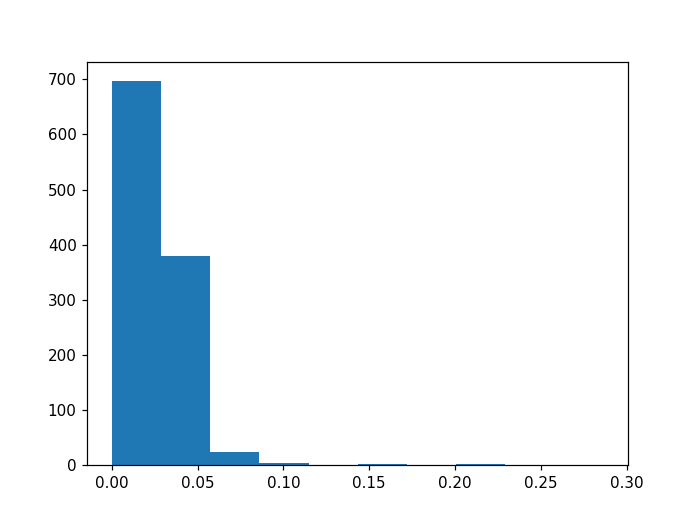

0.2866672843509682 0.02518290024243066


In [63]:
plt.figure()
plt.hist(ptau_density_abeta_)
# plt.xlim([0,ptau_density_abeta_.max()])
plt.show()
print(ptau_density_abeta_.max(),ptau_density_abeta_.mean())

<IPython.core.display.Javascript object>


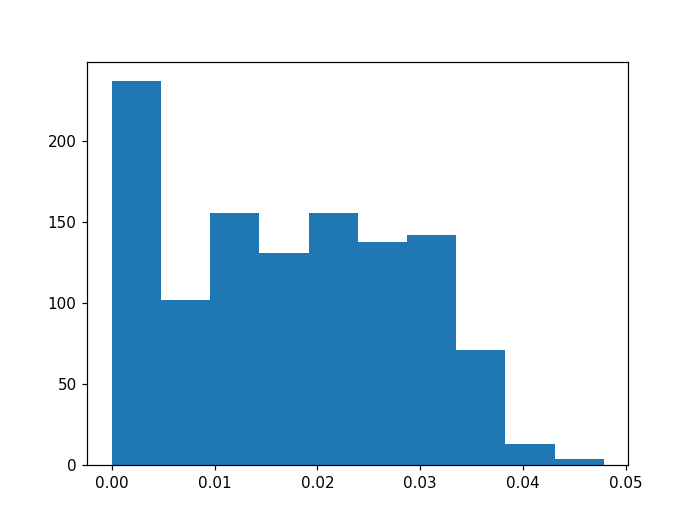

0.04787551696570659 0.017101533288613253


In [64]:
plt.figure()
plt.hist(ptau_density_outside)
plt.show()

print(ptau_density_outside.max(),ptau_density_outside.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

<IPython.core.display.Javascript object>


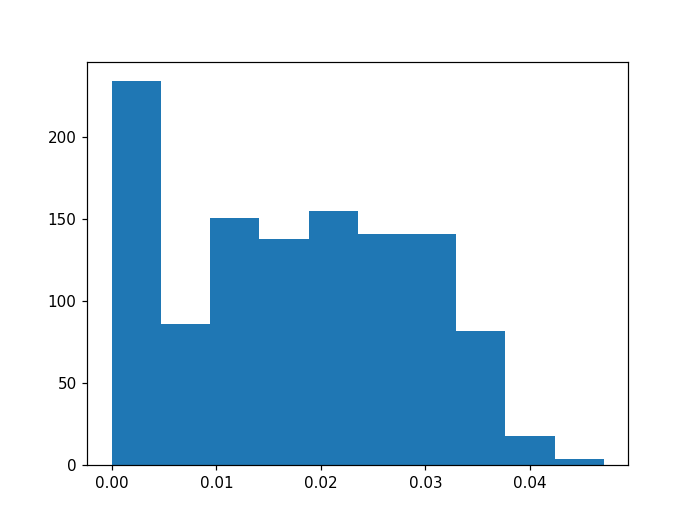

0.047058875 0.01721655989130435


In [66]:
plt.figure()
plt.hist(ptau_density_overall)
plt.show()

print(ptau_density_overall.max(),ptau_density_overall.mean())

<IPython.core.display.Javascript object>


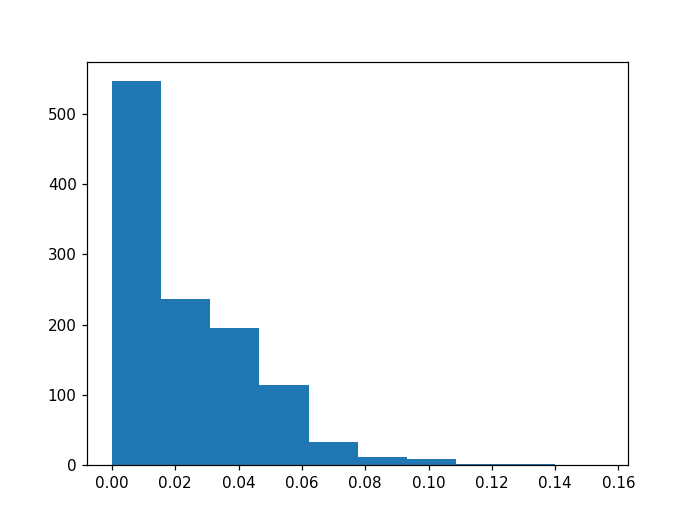

0.15535 0.022585938152173916


In [67]:
plt.figure()
plt.hist(abeta_density_overall)
plt.show()

print(abeta_density_overall.max(),abeta_density_overall.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

In [94]:
# Find the overall density of the tissue 
print(stats_[stats_[:,1]+stats_[:,2]<500].shape)

(90, 3)


In [95]:
stats_final = stats_[stats_[:,1]+stats_[:,2]>=100]

In [100]:
total_pixels = np.sum(stats_final,axis=0)

In [98]:
total_volume = len(stats_final)*200*200*200

In [99]:
total_volume

8832000000

In [101]:
total_pixels/total_volume

array([0.0006648 , 0.01793383, 0.02352692])

In [104]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_volume-total_pixels[2]))

ABETA-PTAU overlap density: 0.02825697134245555
PTAU outside ABETA density: 0.01768510822413899


# Compute for 3

In [105]:
ptau_zarr = zarr.open(bdir(name_prefix2+'_segmented.zarr'))
abeta_zarr = zarr.open(bdir('3-abeta_segmented.zarr'))
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 1183) (4525, 2025, 1183)


In [106]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    overlaps = np.sum(zarr1_*zarr2_)
    non_overlaps_1 = np.sum(zarr1_)
    non_overlaps_2 = np.sum(zarr2_)
    return overlaps, non_overlaps_1, non_overlaps_2
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()

100%|██████████| 1518/1518 [01:26<00:00, 17.63it/s]


In [107]:
stats

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 35301, 0),
 (0, 28462, 4),
 (0, 34563, 663),
 (7, 44244, 84),
 (191, 46808, 3819),
 (4, 57249, 3313),
 (1785, 122237, 28894),
 (3798, 76727, 114415),
 (1216, 81864, 36171),
 (411, 66086, 12645),
 (3884, 72570, 71848),
 (1079, 78158, 33734),
 (376, 75290, 13980),
 (85, 44871, 9839),
 (485, 64218, 15963),
 (138, 36598, 6290),
 (431, 43677, 9571),
 (249, 13236, 2683),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 51166, 497),
 (0, 119415, 7414),
 (52, 122408, 3113),
 (1450, 119729, 154808),
 (3423, 126310, 118107),
 (2575, 130952, 65736),
 (6061, 231205, 132587),
 (3779, 167144, 115512),
 (2716, 213329, 78808),
 (1652, 148766, 48184),
 (1218, 142739, 35516),
 (487, 146888, 22265),
 (258, 129262, 7524),
 (1035, 115509, 37880),
 (1373, 131139, 54103),
 (2224, 168072, 45767),
 (961, 185797, 29285),
 (5786, 141463, 89748),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 57591, 782),
 (584, 126234, 21260),

In [110]:
# Filter out any chunk that has no signal in it (assume these are not part of the volume)
threshold = 100

stats_ = np.array([list(stat) for stat in stats])
coords_ = np.asarray(coords)
coords_ = coords_[(stats_[:,1]+stats_[:,2])>threshold]
stats_ = stats_[(stats_[:,1]+stats_[:,2])>threshold]




In [111]:
print(stats_.shape, coords_.shape)

(929, 3) (929, 3, 2)


In [112]:
np.save(bdir('3-abeta_ptau_densities.npy'),stats_)
np.save(bdir('3-coordinates.npy'),coords_)

In [113]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(np.prod(abeta_zarr.chunks)-stats_[:,2])

# Overall ptau densities
ptau_density_overall = stats_[:,1]/np.prod(abeta_zarr.chunks)

# overall abeta densities 
abeta_density_overall = stats_[:,2]/np.prod(abeta_zarr.chunks)

<IPython.core.display.Javascript object>


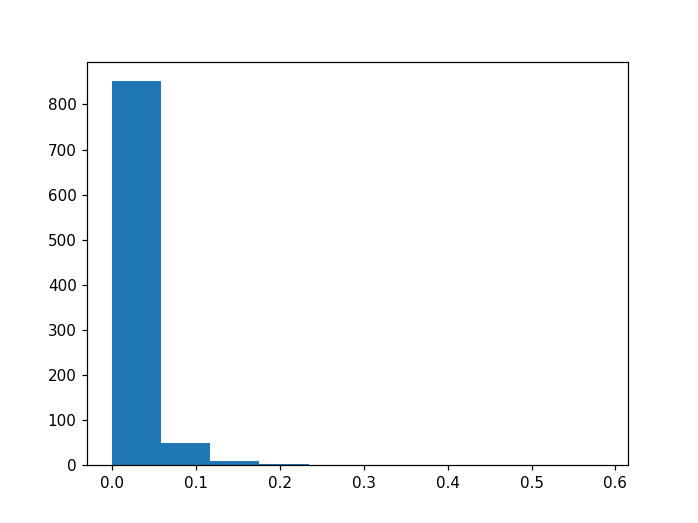

0.586096256684492 0.0318352287700337


In [114]:
plt.figure()
plt.hist(ptau_density_abeta_)
# plt.xlim([0,ptau_density_abeta_.max()])
plt.show()
print(ptau_density_abeta_.max(),ptau_density_abeta_.mean())

<IPython.core.display.Javascript object>


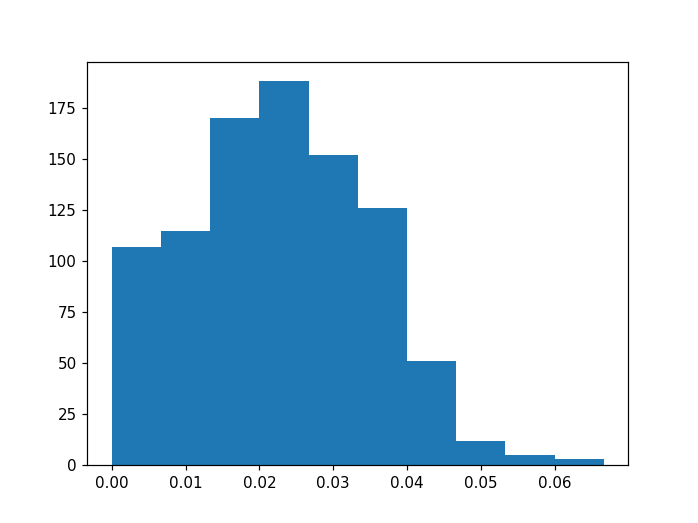

0.0666531673607445 0.022733257638487898


In [115]:
plt.figure()
plt.hist(ptau_density_outside)
plt.show()

print(ptau_density_outside.max(),ptau_density_outside.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

<IPython.core.display.Javascript object>


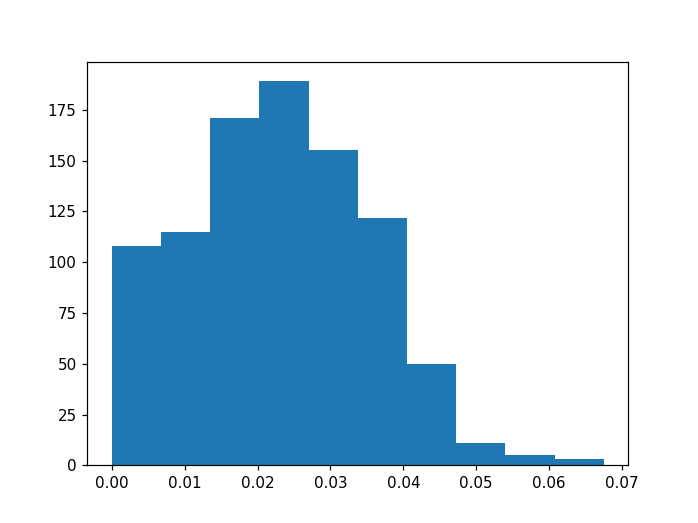

0.06750975 0.02282917222820237


In [116]:
plt.figure()
plt.hist(ptau_density_overall)
plt.show()

print(ptau_density_overall.max(),ptau_density_overall.mean())

<IPython.core.display.Javascript object>


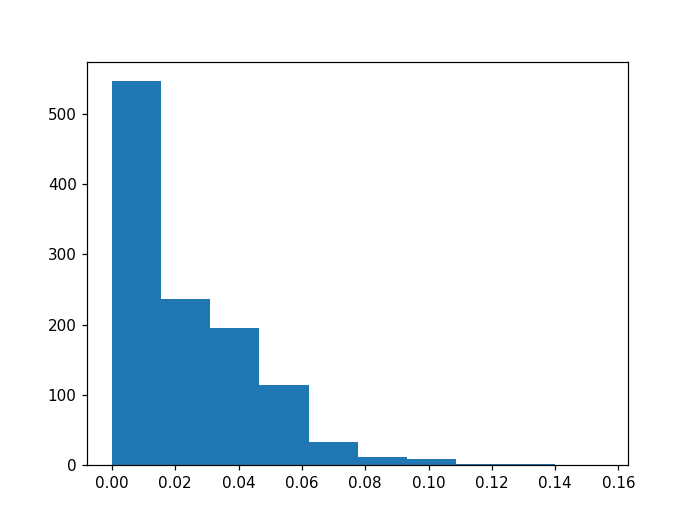

0.15535 0.022585938152173916


In [67]:
plt.figure()
plt.hist(abeta_density_overall)
plt.show()

print(abeta_density_overall.max(),abeta_density_overall.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

In [117]:
stats_final = stats_[stats_[:,1]+stats_[:,2]>=100]

In [118]:
total_pixels = np.sum(stats_final,axis=0)

In [119]:
total_volume = len(stats_final)*200*200*200

In [120]:
total_volume

7432000000

In [121]:
total_pixels/total_volume

array([0.00054965, 0.02282917, 0.01631331])

In [122]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_volume-total_pixels[2]))

ABETA-PTAU overlap density: 0.03369346709918878
PTAU outside ABETA density: 0.022649000440500607


# Image calculator: Use on segmentation masks

In [125]:
print(zarr.open(bdir('1-ptau_segmented.zarr')).shape, # [0,1334]
     zarr.open(bdir('3-ptau_segmented.zarr')).shape, # [0,1183] --> [1000,2183]
     zarr.open(bdir('2-ptau_segmented.zarr')).shape) # [0,1344] --> [1850,3194]

(4525, 2025, 1334) (4525, 2025, 1183) (4525, 2025, 1344)


In [128]:
# Combine 1-3 ptau

top_zarr_path = bdir('1-ptau_segmented.zarr')
bot_zarr_path = bdir('3-ptau_segmented.zarr')
sink_path = bdir('1-3_ptau_segmented_combined.zarr')
overlap_range = [1000,1334] # which slices of top_zarr are overlapping 
mode='max'
num_workers = None # currently bugs if not None 

image_calculator(top_zarr_path, bot_zarr_path, sink_path, 
                    image1_slice_range=overlap_range, mode=mode, num_workers=num_workers)

# check
# tiff_path = sink_path[:-5]+'_tiffs'
# convert_zarr_to_tiff(sink_path, tiff_path, num_workers=24)

Time elapsed for memory-intensive assignment: 175.9146409034729


<zarr.core.Array (4525, 2025, 2183) uint8>

In [129]:
# Combine 2-3 ptau

top_zarr_path = bdir('1-3_ptau_segmented_combined.zarr')
bot_zarr_path = bdir('2-ptau_segmented.zarr')
sink_path = bdir('1-3-2_ptau_segmented_combined.zarr')
overlap_range = [1850,2183] # which slices of top_zarr are overlapping 
mode='max'
num_workers = None # currently bugs if not None 

image_calculator(top_zarr_path, bot_zarr_path, sink_path, 
                    image1_slice_range=overlap_range, mode=mode, num_workers=num_workers)

# check
# tiff_path = sink_path[:-5]+'_tiffs'
# convert_zarr_to_tiff(sink_path, tiff_path, num_workers=24)

Time elapsed for memory-intensive assignment: 205.4241063594818


<zarr.core.Array (4525, 2025, 3194) uint8>

In [130]:
# Combine 1-3 abeta

top_zarr_path = bdir('1-abeta_segmented.zarr')
bot_zarr_path = bdir('3-abeta_segmented.zarr')
sink_path = bdir('1-3_abeta_segmented_combined.zarr')
overlap_range = [1000,1334] # which slices of top_zarr are overlapping 
mode='max'
num_workers = None # currently bugs if not None 

image_calculator(top_zarr_path, bot_zarr_path, sink_path, 
                    image1_slice_range=overlap_range, mode=mode, num_workers=num_workers)

# check
# tiff_path = sink_path[:-5]+'_tiffs'
# convert_zarr_to_tiff(sink_path, tiff_path, num_workers=24)

Time elapsed for memory-intensive assignment: 233.25637578964233


<zarr.core.Array (4525, 2025, 2183) uint16>

In [131]:
# Combine 2-3 abeta

top_zarr_path = bdir('1-3_abeta_segmented_combined.zarr')
bot_zarr_path = bdir('2-abeta_segmented.zarr')
sink_path = bdir('1-3-2_abeta_segmented_combined.zarr')
overlap_range = [1850,2183] # which slices of top_zarr are overlapping 
mode='max'
num_workers = None # currently bugs if not None 

image_calculator(top_zarr_path, bot_zarr_path, sink_path, 
                    image1_slice_range=overlap_range, mode=mode, num_workers=num_workers)

# check
# tiff_path = sink_path[:-5]+'_tiffs'
# convert_zarr_to_tiff(sink_path, tiff_path, num_workers=24)

Time elapsed for memory-intensive assignment: 265.63736295700073


<zarr.core.Array (4525, 2025, 3194) uint16>

# Compute densities

In [132]:
ptau_zarr = zarr.open(bdir('1-3-2_ptau_segmented_combined.zarr'))
abeta_zarr = zarr.open(bdir('1-3-2_abeta_segmented_combined.zarr'))
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 3194) (4525, 2025, 3194)


In [133]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    overlaps = np.sum(zarr1_*zarr2_)
    non_overlaps_1 = np.sum(zarr1_)
    non_overlaps_2 = np.sum(zarr2_)
    return overlaps, non_overlaps_1, non_overlaps_2
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()

100%|██████████| 4048/4048 [01:16<00:00, 53.11it/s] 


In [134]:
stats

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 268, 113),
 (31, 3088, 1493),
 (0, 1749, 129),
 (0, 0, 0),
 (0, 0, 0),
 (0, 1242, 0),
 (0, 0, 0),
 (0, 1346, 790),
 (36, 3483, 5176),
 (0, 107, 0),
 (0, 4, 0),
 (0, 744, 164),
 (0, 127, 0),
 (0, 0, 0),
 (0, 1007, 0),
 (16, 25857, 2588),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 393, 41),
 (0, 159, 8),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 106),
 (0, 0, 0),
 (0, 5, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 75),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 504, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 275, 36),
 (0, 115, 64),
 (0, 0, 0),
 (0, 283, 88),
 (0, 156, 27),
 (0, 162, 512),
 (2779, 3828, 41849),
 (3094, 4142, 10793),
 (0, 0, 0),
 (0, 0, 0),
 (0, 128, 0),
 (0, 446, 169),
 (0, 374, 15),
 (0, 223, 0),
 (41, 1142, 1403),
 (210, 9432, 3560),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (

In [135]:
# Filter out any chunk that has no signal in it (assume these are not part of the volume)
threshold = 100

stats_ = np.array([list(stat) for stat in stats])
coords_ = np.asarray(coords)
coords_ = coords_[(stats_[:,1]+stats_[:,2])>threshold]
stats_ = stats_[(stats_[:,1]+stats_[:,2])>threshold]




In [136]:
print(stats_.shape, coords_.shape)

(2940, 3) (2940, 3, 2)


In [137]:
np.save(bdir('1-2-3-abeta_ptau_densities.npy'),stats_)
np.save(bdir('1-2-3-coordinates.npy'),coords_)

In [138]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(np.prod(abeta_zarr.chunks)-stats_[:,2])

# Overall ptau densities
ptau_density_overall = stats_[:,1]/np.prod(abeta_zarr.chunks)

# overall abeta densities 
abeta_density_overall = stats_[:,2]/np.prod(abeta_zarr.chunks)

<IPython.core.display.Javascript object>


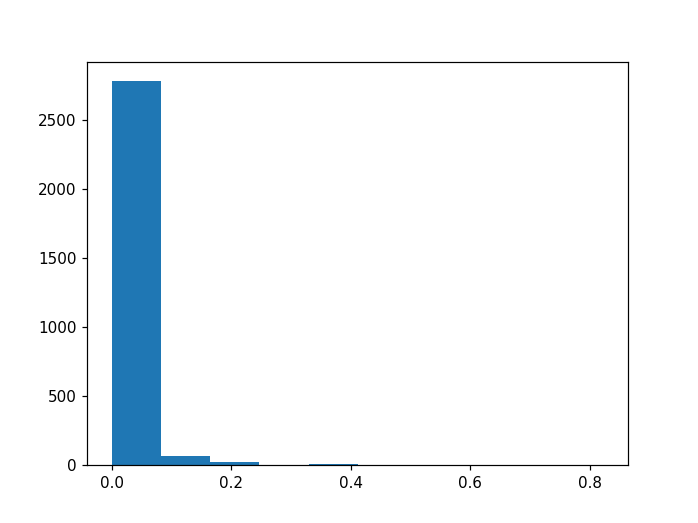

0.8235294117647058 0.033899222904959565


In [139]:
plt.figure()
plt.hist(ptau_density_abeta_)
# plt.xlim([0,ptau_density_abeta_.max()])
plt.show()
print(ptau_density_abeta_.max(),ptau_density_abeta_.mean())

<IPython.core.display.Javascript object>


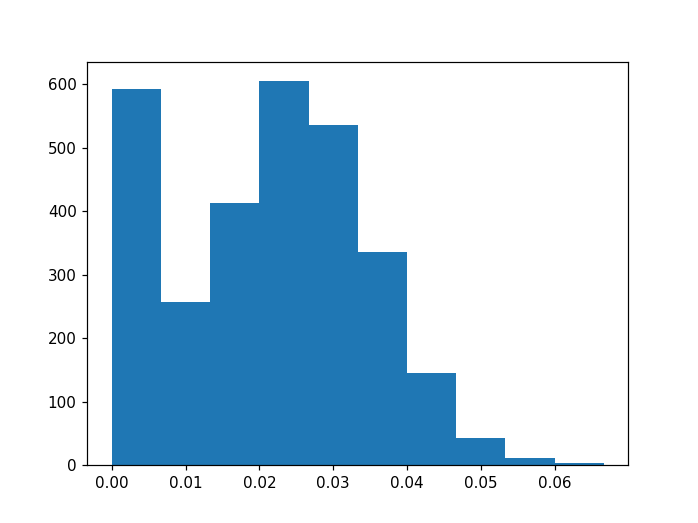

0.0666531673607445 0.021143404909689956


In [140]:
plt.figure()
plt.hist(ptau_density_outside)
plt.show()

print(ptau_density_outside.max(),ptau_density_outside.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

<IPython.core.display.Javascript object>


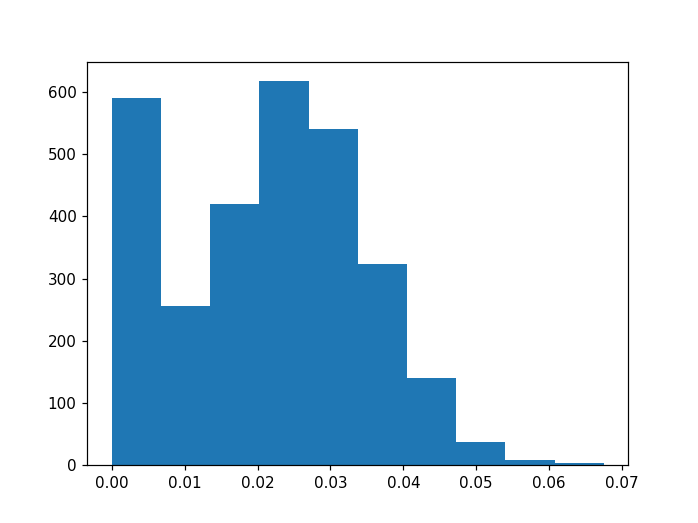

0.06750975 0.02128156662414966


In [141]:
plt.figure()
plt.hist(ptau_density_overall)
plt.show()

print(ptau_density_overall.max(),ptau_density_overall.mean())

<IPython.core.display.Javascript object>


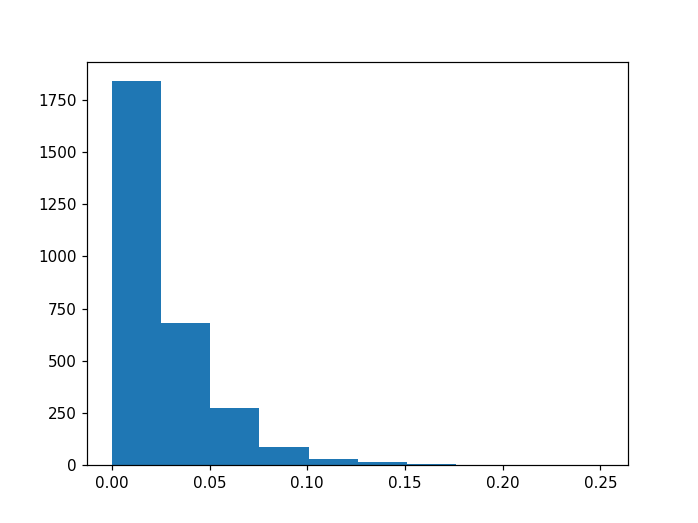

0.251753875 0.02322264357993197


In [142]:
plt.figure()
plt.hist(abeta_density_overall)
plt.show()

print(abeta_density_overall.max(),abeta_density_overall.mean())
# print(ptau_density_outside_.max(),ptau_density_outside_.mean())

In [143]:
stats_final = stats_[stats_[:,1]+stats_[:,2]>=100]

In [144]:
total_pixels = np.sum(stats_final,axis=0)

In [145]:
total_volume = len(stats_final)*200*200*200

In [146]:
total_volume

23520000000

In [147]:
total_pixels/total_volume

array([0.00077455, 0.02128157, 0.02322264])

In [148]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_volume-total_pixels[2]))

ABETA-PTAU overlap density: 0.03335327017254449
PTAU outside ABETA density: 0.020994564814510643


# For making cortical layer density heat map

In [16]:
layer4 = read_annotations_json(bdir('cortical_layer_segmentation.json'), 'corticallayer').astype('int')
layer5 = read_annotations_json(bdir('cortical_layer_segmentation.json'), 'corticallayer5').astype('int')

In [17]:
layer4[layer4[:,2]==3002,2] = 3005

In [18]:
zs = np.unique(layer4[:,2].astype('int'))
zs

array([ 221,  339,  479,  605,  753,  878,  997, 1093, 1181, 1292, 1440,
       1509, 1598, 1647, 1758, 1891, 2036, 2233, 2336, 2544, 2645, 2802,
       3005])

In [23]:
# test: make contour hull for one of the Z sections
# masks = []
masks = np.zeros((1131,506,3194//4),dtype='uint8')
for idx,z in tqdm(enumerate(zs[:-1])):

    img_shape = [4525,2025] # in original resolution
    mask_path = bdir('cortical_layers/corticallayer4_%d.tif'%z) # concave hull mask write path
    x0 = 0
    y0 = 0 
    z0 = 0
    downsample_factor = (.25,.25)


    ##################
    border_pts = layer4[layer4[:,2]==zs[idx+1]]
    border_pts[:,0] -= x0; border_pts[:,1] -= y0; border_pts[:,2] -= z0
    img = Image.new('L', img_shape[:2], 0)
    ImageDraw.Draw(img).polygon([tuple(border_pt.astype('int')) for border_pt in border_pts[:,:2]], outline=1, fill=1)
    mask = np.array(img).T
    if downsample_factor is not None:
        mask = (ndi.zoom(mask, downsample_factor, order=1)).astype('uint8')
#     print(zs[idx+1]//4,z//4)
    masks[:,:,z//4:zs[idx+1]//4] = np.repeat(mask[:,:,np.newaxis],zs[idx+1]//4-z//4,axis=2)
#     masks.append(mask)
    #io.writeData(mask_path,mask)

0it [00:00, ?it/s]

84 55


3it [00:00,  4.33it/s]

119 84
151 119
188 151


7it [00:00,  6.48it/s]

219 188
249 219
273 249
295 273


11it [00:01,  8.76it/s]

323 295
360 323
377 360
399 377


15it [00:01, 10.70it/s]

411 399
439 411
472 439
509 472


17it [00:01, 10.46it/s]

558 509
584 558
636 584


21it [00:01, 10.83it/s]

661 636
700 661
751 700


22it [00:02, 10.68it/s]


In [25]:
io.writeData(bdir('cortical_layer_4_4xdownsampled.tif'),masks.astype('uint8'))

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/cortical_layer_4_4xdownsampled.tif'

### Do this for cortical layer 5

In [28]:
layer5 = read_annotations_json(bdir('cortical_layer_segmentation.json'), 'corticallayer5').astype('int')

layer5

array([[1017, 1879,  339],
       [ 577, 1870,  339],
       [ 214, 1854,  339],
       ...,
       [2250, 1679, 1509],
       [2301, 1807, 1509],
       [2395, 1931, 1509]])

In [29]:
zs = np.unique(layer5[:,2].astype('int'))
zs

array([ 339,  479,  605,  753,  878,  997, 1093, 1181, 1292, 1440, 1509,
       1598, 1647, 1758, 1891, 2036, 2233, 2336, 2544, 2645, 2802, 3005])

In [32]:
# test: make contour hull for one of the Z sections
# masks = []
masks = np.zeros((1131,506,3194//4),dtype='uint8')
for idx,z in tqdm(enumerate(zs[:-1])):

    img_shape = [4525,2025] # in original resolution
#     mask_path = bdir('cortical_layers/corticallayer4_%d.tif'%z) # concave hull mask write path
    x0 = 0
    y0 = 0 
    z0 = 0
    downsample_factor = (.25,.25)


    ##################
    border_pts = layer5[layer5[:,2]==zs[idx+1]]
    border_pts[:,0] -= x0; border_pts[:,1] -= y0; border_pts[:,2] -= z0
    img = Image.new('L', img_shape[:2], 0)
    ImageDraw.Draw(img).polygon([tuple(border_pt.astype('int')) for border_pt in border_pts[:,:2]], outline=1, fill=1)
    mask = np.array(img).T
    if downsample_factor is not None:
        mask = (ndi.zoom(mask, downsample_factor, order=1)).astype('uint8')
#     print(zs[idx+1]//4,z//4)
    masks[:,:,z//4:zs[idx+1]//4] = np.repeat(mask[:,:,np.newaxis],zs[idx+1]//4-z//4,axis=2)
#     masks.append(mask)
    #io.writeData(mask_path,mask)

21it [00:02, 10.47it/s]


In [33]:
io.writeData(bdir('cortical_layer_5_4xdownsampled.tif'),masks.astype('uint8'))

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/cortical_layer_5_4xdownsampled.tif'

In [34]:
# Add them together to get overall mask

mask_5 = io.readData(bdir('cortical_layer_5_4xdownsampled.tif'))
mask_4 = io.readData(bdir('cortical_layer_4_4xdownsampled.tif'))

mask_overall = mask_5 + mask_4
io.writeData(bdir('all_layers_4xdownsampled.tif'),mask_overall)

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/all_layers_4xdownsampled.tif'

In [48]:
# convert to zarrs
mask_zarr = zarr.create(store=zarr.DirectoryStore(bdir('cortical_layer_5_4xdownsampled.zarr')), shape=mask_5.shape, 
                            chunks=(200,)*3, dtype='uint16', overwrite=True)
mask_zarr[:] = mask_5

mask_zarr = zarr.create(store=zarr.DirectoryStore(bdir('cortical_layer_4_4xdownsampled.zarr')), shape=mask_5.shape, 
                            chunks=(200,)*3, dtype='uint16', overwrite=True)
mask_zarr[:] = mask_4

mask_zarr = zarr.create(store=zarr.DirectoryStore(bdir('all_layers_4xdownsampled.zarr')), shape=mask_5.shape, 
                            chunks=(200,)*3, dtype='uint16', overwrite=True)
mask_zarr[:] = mask_overall

# Compute densities in various cortical layers

In [51]:
ptau_zarr = zarr.open(bdir('1-3-2_ptau_segmented_combined.zarr'))
abeta_zarr = zarr.open(bdir('1-3-2_abeta_segmented_combined.zarr'))
mask_zarr = zarr.open(bdir('all_layers_4xdownsampled.zarr'))
downsample_factor=(.25,)*3
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 3194) (4525, 2025, 3194)


In [53]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,mask_zarr,downsample_factor,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    
    xf,yf,zf = downsample_factor
    mask_ = mask_zarr[int(np.round(xr[0]*xf)):int(np.round(xr[1]*xf)),
                      int(np.round(yr[0]*yf)):int(np.round(yr[1]*yf)),
                      int(np.round(zr[0]*zf)):int(np.round(zr[1]*zf))]
    mask_ = ndi.zoom(mask_, tuple([zarr1_.shape[b]/mask_.shape[b] for b in range(3)]),order=1).astype('uint8')
    
    overlaps = np.sum(zarr1_*zarr2_*mask_)
    non_overlaps_1 = np.sum(zarr1_*mask_)
    non_overlaps_2 = np.sum(zarr2_*mask_)
    total_vol = mask_.sum()
    return overlaps, non_overlaps_1, non_overlaps_2, total_vol
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr, mask_zarr, downsample_factor)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()


 73%|███████▎  | 2961/4048 [01:05<00:41, 26.03it/s]


100%|██████████| 4048/4048 [01:25<00:00, 47.09it/s]

In [54]:
stats

[(0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0, 0),
 (0, 0, 0,

In [59]:
# # Filter out any chunk that has no signal in it (assume these are not part of the volume)
# threshold = 100

stats_ = np.array([list(stat) for stat in stats])
# coords_ = np.asarray(coords)
# coords_ = coords_[(stats_[:,1]+stats_[:,2])>threshold]
# stats_ = stats_[(stats_[:,1]+stats_[:,2])>threshold]



In [60]:
np.save(bdir('1-2-3-abeta_ptau_densities.npy'),stats_)
np.save(bdir('1-2-3-coordinates.npy'),coords)

In [61]:
# total volume of te tissue
# total_vol = mask_overall.sum()*64 # since it's 4x downsampled
total_vol = np.sum(stats_[:,3])

In [62]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(np.prod(abeta_zarr.chunks)-stats_[:,2])

# Overall ptau densities
ptau_density_overall = stats_[:,1]/np.prod(abeta_zarr.chunks)

# overall abeta densities 
abeta_density_overall = stats_[:,2]/np.prod(abeta_zarr.chunks)

In [63]:
total_pixels = np.sum(stats_,axis=0)

In [64]:
total_pixels/total_vol

array([0.00102283, 0.02812654, 0.03071758, 1.        ])

In [65]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_vol-total_pixels[2]))

ABETA-PTAU overlap density: 0.03329780323226817
PTAU outside ABETA density: 0.027962657393958743


In [186]:
stats_ = np.load(bdir('1-2-3-abeta_ptau_densities.npy'))
total_vol = np.sum(stats_[:,3])

total_pixels = np.sum(stats_,axis=0)

In [188]:
total_pixels/total_vol

array([0.00102283, 0.02812654, 0.03071758, 1.        ])

In [189]:
print("Overall PTAU density:",total_pixels[1]/total_vol)
print("Overall ABETA density:",total_pixels[2]/total_vol)

Overall PTAU density: 0.028126540164078003
Overall ABETA density: 0.03071758019105858


# Do for both of the cortical layers

In [66]:
ptau_zarr = zarr.open(bdir('1-3-2_ptau_segmented_combined.zarr'))
abeta_zarr = zarr.open(bdir('1-3-2_abeta_segmented_combined.zarr'))
mask_zarr = zarr.open(bdir('cortical_layer_4_4xdownsampled.zarr'))
downsample_factor=(.25,)*3
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 3194) (4525, 2025, 3194)


In [67]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,mask_zarr,downsample_factor,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    
    xf,yf,zf = downsample_factor
    mask_ = mask_zarr[int(np.round(xr[0]*xf)):int(np.round(xr[1]*xf)),
                      int(np.round(yr[0]*yf)):int(np.round(yr[1]*yf)),
                      int(np.round(zr[0]*zf)):int(np.round(zr[1]*zf))]
    mask_ = ndi.zoom(mask_, tuple([zarr1_.shape[b]/mask_.shape[b] for b in range(3)]),order=1).astype('uint8')
    
    overlaps = np.sum(zarr1_*zarr2_*mask_)
    non_overlaps_1 = np.sum(zarr1_*mask_)
    non_overlaps_2 = np.sum(zarr2_*mask_)
    total_vol = mask_.sum()
    return overlaps, non_overlaps_1, non_overlaps_2, total_vol
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr, mask_zarr, downsample_factor)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()


 70%|██████▉   | 2824/4048 [00:57<00:35, 34.91it/s]


100%|██████████| 4048/4048 [01:21<00:00, 49.44it/s]

In [68]:
# # Filter out any chunk that has no signal in it (assume these are not part of the volume)
# threshold = 100

stats_ = np.array([list(stat) for stat in stats])
# coords_ = np.asarray(coords)
# coords_ = coords_[(stats_[:,1]+stats_[:,2])>threshold]
# stats_ = stats_[(stats_[:,1]+stats_[:,2])>threshold]

np.save(bdir('1-2-3-abeta_ptau_densities_layer4.npy'),stats_)
# np.save(bdir('1-2-3-coordinates.npy'),coords)

In [128]:
# total volume of te tissue
# total_vol = mask_overall.sum()*64 # since it's 4x downsampled
total_vol = np.sum(stats_[:,3])

In [129]:
total_pixels = np.sum(stats_,axis=0)

In [130]:
total_pixels/total_vol

array([0.00127083, 0.03077319, 0.03871921, 1.        ])

In [132]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_vol-total_pixels[2]))
print('PTAU total density:',total_pixels[1]/total_vol)
print('ABETA total density:',total_pixels[2]/total_vol)

ABETA-PTAU overlap density: 0.032821704280778484
PTAU outside ABETA density: 0.03069067872809933
PTAU total density: 0.03077319035555496
ABETA total density: 0.038719210734894774


# Heat maps (layer 4)

In [164]:
stats_ = np.load(bdir('1-2-3-abeta_ptau_densities_layer4.npy'))
coords = np.load(bdir('1-2-3-coordinates.npy'))

In [165]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(stats_[:,3]-stats_[:,2])
ptau_density_outside_ = ptau_density_outside[ptau_density_abeta>=0]

# Overall ptau densities
ptau_density_overall = stats_[:,1]/stats_[:,3]
ptau_density_overall_ = ptau_density_overall[ptau_density_abeta>=0]

# overall abeta densities 
abeta_density_overall = stats_[:,2]/stats_[:,3]
abeta_density_overall_ = abeta_density_overall[ptau_density_abeta>=0]

coords_ = np.array(coords)[ptau_density_abeta>=0]

In [166]:
# Let's plot one z section for example

z_slice = 800

coords_slice = coords_[coords_[:,2,0]==z_slice]
abeta_density_slice = abeta_density_overall_[coords_[:,2,0]==z_slice]
ptau_density_slice = ptau_density_overall_[coords_[:,2,0]==z_slice]
ptau_density_outside_slice = ptau_density_outside_[coords_[:,2,0]==z_slice]
ptau_density_abeta_slice = ptau_density_abeta_[coords_[:,2,0]==z_slice]

In [167]:
heatmap_abeta = np.zeros((4525,2025))
heatmap_ptau = np.zeros((4525,2025))
heatmap_ptau_outside = np.zeros((4525,2025))
heatmap_ptau_inside = np.zeros((4525,2025))
mask = io.readData(bdir('cortical_layer_4_4xdownsampled.tif'))[:,:,z_slice//4]
mask = ndi.zoom(mask, tuple([heatmap_abeta.shape[k]/mask.shape[k] for k in range(2)]), order=1)

# abeta_density
for idx,coord in enumerate(coords_slice):
    xr,yr,_ = coord
    heatmap_abeta[xr[0]:xr[1],yr[0]:yr[1]] = abeta_density_slice[idx]
    heatmap_ptau[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_slice[idx]
    heatmap_ptau_outside[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_outside_slice[idx]
    heatmap_ptau_inside[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_abeta_slice[idx]
    
heatmap_abeta *= mask
heatmap_ptau *= mask
heatmap_ptau_outside *= mask
heatmap_ptau_inside *= mask

heatmap_abeta = (heatmap_abeta*65535).astype('uint16')
heatmap_ptau = (heatmap_ptau*65535).astype('uint16')
heatmap_ptau_outside = (heatmap_ptau_outside*65535).astype('uint16')
heatmap_ptau_inside = (heatmap_ptau_inside*65535).astype('uint16')


In [168]:
io.writeData(bdir('cortical_layer_4_heatmap_abeta_z%d.tif'%z_slice),heatmap_abeta)
io.writeData(bdir('cortical_layer_4_heatmap_ptau_z%d.tif'%z_slice),heatmap_ptau)
io.writeData(bdir('cortical_layer_4_heatmap_ptau_outside_z%d.tif'%z_slice),heatmap_ptau_outside)
io.writeData(bdir('cortical_layer_4_heatmap_ptau_inside_z%d.tif'%z_slice),heatmap_ptau_inside)

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/cortical_layer_4_heatmap_ptau_inside_z800.tif'

In [120]:
# ptau_test = ptau_zarr[:,:,1600:1800]
# abeta_test = abeta_zarr[:,:,1600:1800]

# io.writeData(bdir('ptau_segmented.tif'),ptau_test)
# io.writeData(bdir('abeta_segmented.tif'),abeta_test)

# Cortical layer 5

In [74]:
ptau_zarr = zarr.open(bdir('1-3-2_ptau_segmented_combined.zarr'))
abeta_zarr = zarr.open(bdir('1-3-2_abeta_segmented_combined.zarr'))
mask_zarr = zarr.open(bdir('cortical_layer_5_4xdownsampled.zarr'))
downsample_factor=(.25,)*3
num_workers = 24

#####
print(ptau_zarr.shape, abeta_zarr.shape)

(4525, 2025, 3194) (4525, 2025, 3194)


In [75]:
coords = get_chunk_coords(ptau_zarr.shape, ptau_zarr.chunks)

def compute_abeta_ptau_overlap(zarr1,zarr2,mask_zarr,downsample_factor,coord):
    xr,yr,zr = coord
    zarr1_ = zarr1[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    zarr2_ = zarr2[xr[0]:xr[1],yr[0]:yr[1],zr[0]:zr[1]]
    
    xf,yf,zf = downsample_factor
    mask_ = mask_zarr[int(np.round(xr[0]*xf)):int(np.round(xr[1]*xf)),
                      int(np.round(yr[0]*yf)):int(np.round(yr[1]*yf)),
                      int(np.round(zr[0]*zf)):int(np.round(zr[1]*zf))]
    mask_ = ndi.zoom(mask_, tuple([zarr1_.shape[b]/mask_.shape[b] for b in range(3)]),order=1).astype('uint8')
    
    overlaps = np.sum(zarr1_*zarr2_*mask_)
    non_overlaps_1 = np.sum(zarr1_*mask_)
    non_overlaps_2 = np.sum(zarr2_*mask_)
    total_vol = mask_.sum()
    return overlaps, non_overlaps_1, non_overlaps_2, total_vol
    
if __name__ == '__main__':
    p = mp.Pool(num_workers)
    f = partial(compute_abeta_ptau_overlap, ptau_zarr, abeta_zarr, mask_zarr, downsample_factor)
    stats = list(tqdm(p.imap(f, coords), total=len(coords)))
    p.close()
    p.join()


 68%|██████▊   | 2758/4048 [00:56<00:27, 47.22it/s]


100%|██████████| 4048/4048 [01:20<00:00, 50.25it/s]

In [76]:
# # Filter out any chunk that has no signal in it (assume these are not part of the volume)
# threshold = 100

stats_ = np.array([list(stat) for stat in stats])
# coords_ = np.asarray(coords)
# coords_ = coords_[(stats_[:,1]+stats_[:,2])>threshold]
# stats_ = stats_[(stats_[:,1]+stats_[:,2])>threshold]

np.save(bdir('1-2-3-abeta_ptau_densities_layer5.npy'),stats_)
# np.save(bdir('1-2-3-coordinates.npy'),coords)

In [135]:
# total volume of te tissue
# total_vol = mask_overall.sum()*64 # since it's 4x downsampled
total_vol = np.sum(stats_[:,3])

In [136]:
total_pixels = np.sum(stats_,axis=0)

In [137]:
total_pixels/total_vol

array([7.58006375e-04, 2.53000667e-02, 2.21730142e-02, 1.00000000e+00])

In [138]:
print('ABETA-PTAU overlap density:',total_pixels[0]/total_pixels[2])
print('PTAU outside ABETA density:',(total_pixels[1]-total_pixels[0])/(total_vol-total_pixels[2]))
print('PTAU total density:',total_pixels[1]/total_vol)
print('ABETA total density:',total_pixels[2]/total_vol)

ABETA-PTAU overlap density: 0.034185987030710074
PTAU outside ABETA density: 0.025098571304602753
PTAU total density: 0.02530006670235592
ABETA total density: 0.02217301417984966


# Heat maps (layer 5)

In [169]:
stats_ = np.load(bdir('1-2-3-abeta_ptau_densities_layer5.npy'))
coords = np.load(bdir('1-2-3-coordinates.npy'))

In [170]:
# PTAU fiber density colocalizing with ABETA
ptau_density_abeta = stats_[:,0]/stats_[:,2]
ptau_density_abeta =np.nan_to_num(ptau_density_abeta,nan=-1)
ptau_density_abeta_ = ptau_density_abeta[ptau_density_abeta>=0]

# PTAU fiber density not colocalizing with ABETA
ptau_density_outside = (stats_[:,1]-stats_[:,0])/(stats_[:,3]-stats_[:,2])
ptau_density_outside_ = ptau_density_outside[ptau_density_abeta>=0]

# Overall ptau densities
ptau_density_overall = stats_[:,1]/stats_[:,3]
ptau_density_overall_ = ptau_density_overall[ptau_density_abeta>=0]

# overall abeta densities 
abeta_density_overall = stats_[:,2]/stats_[:,3]
abeta_density_overall_ = abeta_density_overall[ptau_density_abeta>=0]

coords_ = np.array(coords)[ptau_density_abeta>=0]

In [171]:
# Let's plot one z section for example

z_slice = 800

coords_slice = coords_[coords_[:,2,0]==z_slice]
abeta_density_slice = abeta_density_overall_[coords_[:,2,0]==z_slice]
ptau_density_slice = ptau_density_overall_[coords_[:,2,0]==z_slice]
ptau_density_outside_slice = ptau_density_outside_[coords_[:,2,0]==z_slice]
ptau_density_abeta_slice = ptau_density_abeta_[coords_[:,2,0]==z_slice]

In [172]:
heatmap_abeta = np.zeros((4525,2025))
heatmap_ptau = np.zeros((4525,2025))
heatmap_ptau_outside = np.zeros((4525,2025))
heatmap_ptau_inside = np.zeros((4525,2025))
mask = io.readData(bdir('cortical_layer_5_4xdownsampled.tif'))[:,:,z_slice//4]
mask = ndi.zoom(mask, tuple([heatmap_abeta.shape[k]/mask.shape[k] for k in range(2)]), order=1)

# abeta_density
for idx,coord in enumerate(coords_slice):
    xr,yr,_ = coord
    heatmap_abeta[xr[0]:xr[1],yr[0]:yr[1]] = abeta_density_slice[idx]
    heatmap_ptau[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_slice[idx]
    heatmap_ptau_outside[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_outside_slice[idx]
    heatmap_ptau_inside[xr[0]:xr[1],yr[0]:yr[1]] = ptau_density_abeta_slice[idx]
    
heatmap_abeta *= mask
heatmap_ptau *= mask
heatmap_ptau_outside *= mask
heatmap_ptau_inside *= mask

heatmap_abeta = (heatmap_abeta*65535).astype('uint16')
heatmap_ptau = (heatmap_ptau*65535).astype('uint16')
heatmap_ptau_outside = (heatmap_ptau_outside*65535).astype('uint16')
heatmap_ptau_inside = (heatmap_ptau_inside*65535).astype('uint16')


In [173]:
io.writeData(bdir('cortical_layer_5_heatmap_abeta_z%d.tif'%z_slice),heatmap_abeta)
io.writeData(bdir('cortical_layer_5_heatmap_ptau_z%d.tif'%z_slice),heatmap_ptau)
io.writeData(bdir('cortical_layer_5_heatmap_ptau_outside_z%d.tif'%z_slice),heatmap_ptau_outside)
io.writeData(bdir('cortical_layer_5_heatmap_ptau_inside_z%d.tif'%z_slice),heatmap_ptau_inside)

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/cortical_layer_5_heatmap_ptau_inside_z800.tif'

In [174]:
# ptau_test = ptau_zarr[:,:,1600:1800]
# abeta_zarr_ = zarr.open(bdir('3-abeta_4x_flattened_lectinwarp_cropped.zarr'))
abeta_zarr_ = zarr.open('/mnt/share3/webster/mEhmAD_1-3_real/1-abeta_4x_flattened.zarr')
abeta_test = abeta_zarr_[:,:,800:1000]

In [175]:
# io.writeData(bdir('ptau_segmented.tif'),ptau_test)
io.writeData(bdir('abeta_z800-1000.tif'),abeta_test)

'/mnt/share3/webster/mEhmAD_1-2-3_ptau/abeta_z800-1000.tif'

# Make bar plots

<IPython.core.display.Javascript object>


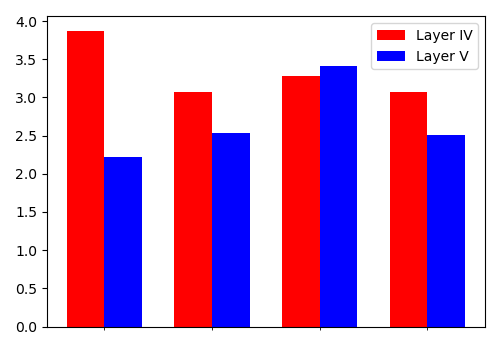

In [176]:
layer4_data = 100*np.array([0.038719210734894774,0.03077319035555496,0.032821704280778484,0.03069067872809933])
layer5_data = 100*np.array([0.02217301417984966,0.02530006670235592,0.034185987030710074,0.025098571304602753])
labels = ['ABETA','PTAU','PTAU (inside ABETA)','PTAU (outside ABETA)']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Layer IV', color='red')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Layer V', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
ax.legend()
ax.set_xticks([])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots.png'))

# New Bar plots

<IPython.core.display.Javascript object>


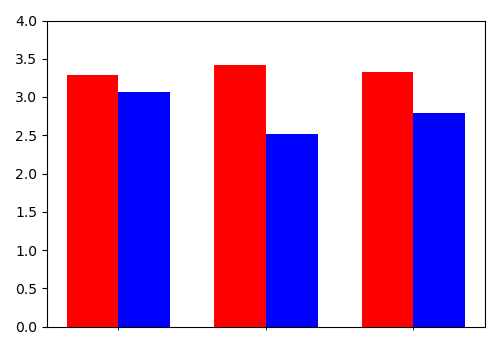

In [192]:
#sort by inside/outside instead of cortical layer

# PTAU outside TOTAL ABETA density: 
layer4_data = 100*np.array([0.032821704280778484,0.034185987030710074,0.03329780323226817]) # inside (layer 4, layer 5, total)
layer5_data = 100*np.array([0.03069067872809933,0.025098571304602753,0.027962657393958743])# outside(layer 4, layer 5, total
labels = ['Layer IV','Layer V','Total']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Inside ABETA', color='red')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Outside ABETA', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
#ax.legend()
ax.set_xticks([])
ax.set_ylim([0,4])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots_inside_vs_outside_new.png'))

<IPython.core.display.Javascript object>


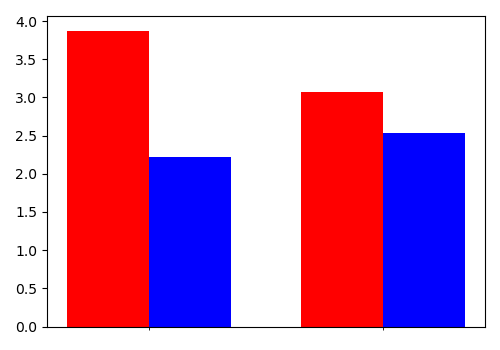

In [179]:
layer4_data = 100*np.array([0.038719210734894774,0.03077319035555496])#,0.032821704280778484,0.03069067872809933])
layer5_data = 100*np.array([0.02217301417984966,0.02530006670235592])#,0.034185987030710074,0.025098571304602753])
labels = ['ABETA','PTAU']#,'PTAU (inside ABETA)','PTAU (outside ABETA)']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Layer IV', color='red')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Layer V', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
#ax.legend()
ax.set_xticks([])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots_abeta_ptau_layers.png'))

<IPython.core.display.Javascript object>


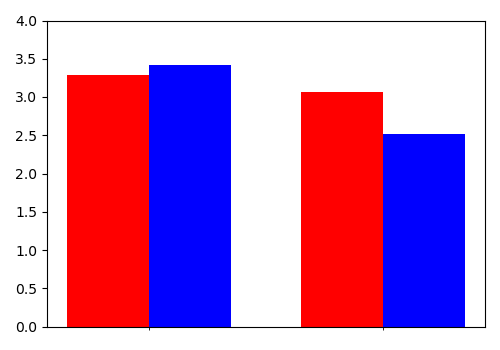

In [181]:
layer4_data = 100*np.array([0.032821704280778484,0.03069067872809933])
layer5_data = 100*np.array([0.034185987030710074,0.025098571304602753])
labels = ['PTAU (inside ABETA)','PTAU (outside ABETA)']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Layer IV', color='red')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Layer V', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
#ax.legend()
ax.set_xticks([])
ax.set_ylim([0,4])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots_abeta_ptau_in_vs_out_layers.png'))

<IPython.core.display.Javascript object>


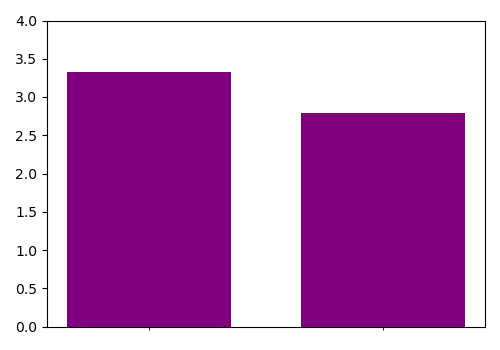

In [185]:
layer4_data = 100*np.array([0.03329780323226817,0.027962657393958743])
layer5_data = 100*np.array([0.03329780323226817,0.027962657393958743])
labels = ['PTAU (inside ABETA)','PTAU (outside ABETA)']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Layer IV', color='purple')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Layer V', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
#ax.legend()
ax.set_xticks([])
ax.set_ylim([0,4])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots_abeta_ptau_in_vs_out_total.png'))

<IPython.core.display.Javascript object>


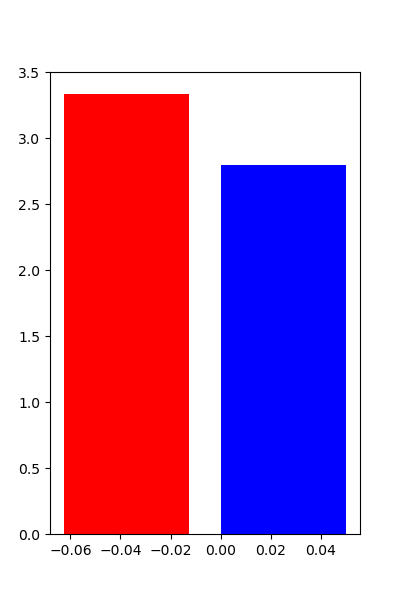

In [199]:
width = 0.05
plt.figure(figsize=(4,6))
plt.bar([0-width*.75,0+width/2],[100*0.03329780323226817,100*0.027962657393958743], width, color=['red','blue'])#,alpha=0.4)
plt.ylim([0,3.5])
#plt.xlim([-.1,.08])
plt.show()
plt.savefig(bdir('density_plots_abeta_ptau_in_vs_out_total.png'))

<IPython.core.display.Javascript object>


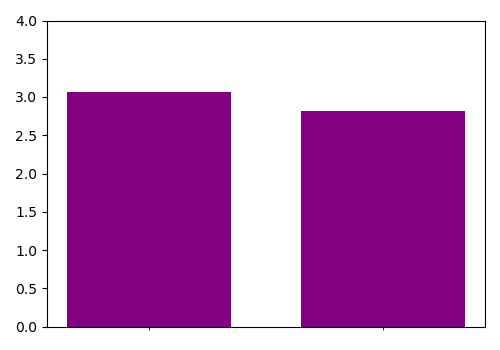

In [190]:
layer4_data = 100*np.array([0.03071758019105858,0.028126540164078003])
layer5_data = 100*np.array([0.03071758019105858,0.028126540164078003])
labels = ['PTAU (inside ABETA)','PTAU (outside ABETA)']

        
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3.5))
rects1 = ax.bar(x - width/2, layer4_data, width, label='Layer IV', color='purple')
rects2 = ax.bar(x + width/2, layer5_data, width, label='Layer V', color='purple')

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Density (%v/v)')
# ax.set_title('Cortical layer ABETA / PTAU densities')
ax.set_xticks(x, labels)
#ax.legend()
ax.set_xticks([])
ax.set_ylim([0,4])
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig(bdir('density_plots_abeta_ptau_total.png'))

In [ ]:
# PTAU inside tOTAL ABETA density:0.03329780323226817
# PTAU outside TOTAL ABETA density: 0.027962657393958743
# Overall PTAU density: 0.028126540164078003
# Overall ABETA density: 0.03071758019105858
